In [11]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Step 2: Load the datasets (replace with your actual paths if needed)
calls = pd.read_csv('calls.csv')
audio = pd.read_csv('audio_recording.csv')

# Step 2.1: Inspect column names
print(calls.columns)
print(audio.columns)

# Step 2.2: Preview the first few rows to understand the structure
print(calls.head())
print(audio.head())

Index(['iot_lora_id', 'port', 'arrtime', 'rssi', 'district', 'post_code',
       'unit'],
      dtype='object')
Index(['iot_lora_id', 'port', 'arrtime', 'rssi', 'district', 'post_code',
       'unit', 'recording'],
      dtype='object')
   iot_lora_id  port              arrtime  rssi  district  post_code     unit
0        17592     6  2024-03-01 00:17:49   -76        46     420064  #12-594
1        17592     6  2024-03-01 00:49:56   -74        46     420064  #12-594
2        17592     6  2024-03-01 01:04:40   -72        46     420064  #12-594
3        17592     6  2024-03-01 01:14:19   -80        46     420064  #12-594
4        17592     6  2024-03-01 01:42:27   -80        46     420064  #12-594
   iot_lora_id  port              arrtime  rssi  district  post_code     unit  \
0        17592     6  2024-03-01 00:17:49   -76        46     420064  #12-594   
1        17592     6  2024-03-01 00:49:56   -74        46     420064  #12-594   
2        17592     6  2024-03-01 01:04:40   -72     

In [14]:
# Step 3.4: Create a proxy 'is_emergency' column based on audio presence and RSSI
# Example logic: If the call has an audio recording or strong RSSI (> -70), mark it as an emergency

calls['is_emergency'] = np.where(
    (calls['has_audio'] == 1) | (calls['rssi'] > -70), 1, 0
)

# Check the distribution of the target variable
print(calls['is_emergency'].value_counts())

1    1649
0    1030
Name: is_emergency, dtype: int64


In [15]:
# Step 3.1: Convert 'arrtime' to datetime format for both datasets
calls['arrtime'] = pd.to_datetime(calls['arrtime'])
audio['arrtime'] = pd.to_datetime(audio['arrtime'])

# Step 3.2: Create time-based features (hour and 2-hour intervals)
calls['hour'] = calls['arrtime'].dt.hour  # Extract hour (0-23)
calls['interval_2hr'] = (calls['hour'] // 2) * 2  # Create 2-hour intervals

# Step 3.3: Add 'has_audio' feature by matching 'iot_lora_id' between datasets
calls['has_audio'] = calls['iot_lora_id'].isin(audio['iot_lora_id']).astype(int)

# Step 3.4: Check if 'is_emergency' column exists or needs to be created
# For now, let’s assume you have a binary 'is_emergency' column (1 = emergency, 0 = non-emergency)
# If not, you'll need to create it based on the problem context
print(calls['is_emergency'].value_counts())

1    1649
0    1030
Name: is_emergency, dtype: int64


In [16]:
# Step 4: Prepare the Features and Target Variables
X = calls[['hour', 'interval_2hr', 'rssi', 'has_audio']]  # Features
y = calls['is_emergency']  # Target

# Step 5: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train the Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 7: Make Predictions and Evaluate Performance
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       207
           1       1.00      1.00      1.00       329

    accuracy                           1.00       536
   macro avg       1.00      1.00      1.00       536
weighted avg       1.00      1.00      1.00       536



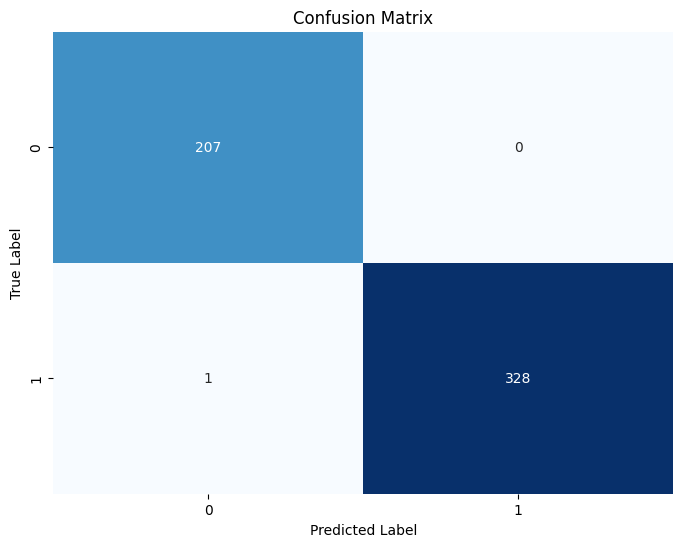

In [17]:
# Step 8.1: Generate a confusion matrix to evaluate performance
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [18]:
# Step 8.2: Display the classification report for detailed metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       207
           1       1.00      1.00      1.00       329

    accuracy                           1.00       536
   macro avg       1.00      1.00      1.00       536
weighted avg       1.00      1.00      1.00       536



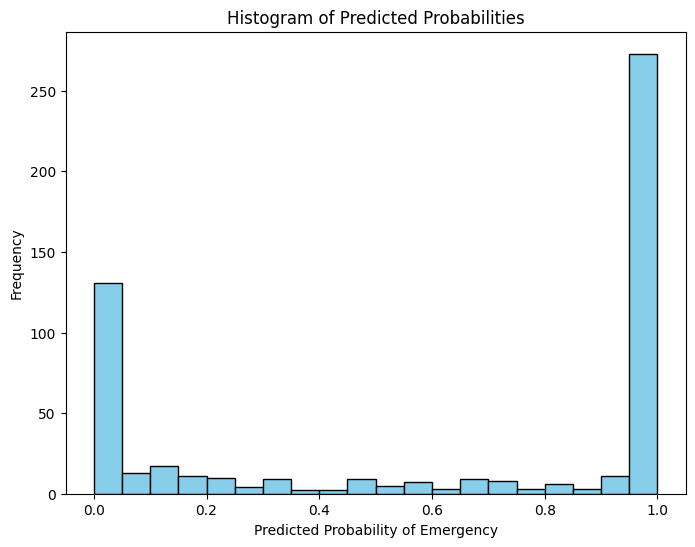

In [19]:
# Step 9: Plot the predicted probabilities for emergencies
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of class 1 (emergency)

plt.figure(figsize=(8, 6))
plt.hist(y_prob, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Predicted Probability of Emergency')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities')
plt.show()

In [20]:
# Bed Occupancy Rates

In [21]:
# Step 1.1: Clean and reformat the historical BOR data
bor_historical_clean = bor_historical.drop([0, 1]).reset_index(drop=True)
bor_historical_clean.columns = ['Year', 'Date', 'AH', 'CGH', 'KTPH', 
                                'NTFGH', 'NUH(A)', 'SGH', 'SKH', 'TTSH', 'WH']

# Convert 'Date' to datetime format
bor_historical_clean['Date'] = pd.to_datetime(bor_historical_clean['Date'])

# Step 1.2: Clean and format the current BOR data
bor_current_clean = bor_current.drop([0, 1]).reset_index(drop=True)
bor_current_clean.columns = ['Date', 'AH', 'CGH', 'KTPH', 'NTFGH', 
                             'NUH(A)', 'SGH', 'SKH', 'TTSH', 'WH']

# Convert 'Date' to datetime format
bor_current_clean['Date'] = pd.to_datetime(bor_current_clean['Date'])

# Combine historical and current BOR data for a unified dataset
bor_data = pd.concat([bor_historical_clean, bor_current_clean], axis=0)

NameError: name 'bor_historical' is not defined

In [22]:
# Step 1: Load the Excel file using a relative path
file_path = "./bed-occupancy-rate_week40y2024 .xlsx"

# Load the relevant sheets into DataFrames
bor_historical = pd.read_excel(file_path, sheet_name='BOR(%)_historical', header=2)  # Skip the first 2 rows
bor_current = pd.read_excel(file_path, sheet_name='BOR', header=2)  # Skip the first 2 rows

# Display the first few rows of each DataFrame to ensure they are loaded correctly
print("Historical BOR Data:")
print(bor_historical.head())

print("\nCurrent BOR Data:")
print(bor_current.head())

Historical BOR Data:
   Years       Date     AH    CGH   KTPH  NTFGH  NUH(A)    SGH  SKH   TTSH  WH
0   2018 2018-01-01  0.399  0.813  0.968  0.789   0.735  0.743  NaN  0.936 NaN
1   2018 2018-01-02  0.382  0.858  1.000  0.847   0.784  0.838  NaN  0.934 NaN
2   2018 2018-01-03  0.399  0.864  0.999  0.875   0.831  0.881  NaN  0.925 NaN
3   2018 2018-01-04  0.424  0.855  1.000  0.871   0.826  0.875  NaN  0.919 NaN
4   2018 2018-01-05  0.429  0.844  1.000  0.843   0.798  0.848  NaN  0.905 NaN

Current BOR Data:
                  Date     AH       CGH   KTPH  NTFGH    NUH(A)       SGH  \
0  2024-09-29 00:00:00  0.523  0.851570  0.792  0.897  0.745875  0.787803   
1  2024-09-30 00:00:00  0.594  0.877260  0.844  0.885  0.774229  0.827715   
2  2024-10-01 00:00:00  0.629  0.884872  0.872  0.878  0.776678  0.847066   
3  2024-10-02 00:00:00  0.654  0.865842  0.819  0.855  0.753575  0.842564   
4  2024-10-03 00:00:00  0.647  0.867745  0.776  0.859  0.746975  0.826493   

        SKH      TTSH  